In [ ]:
pip install yahoofinancials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 981.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.20-py3-none-any.whl size=38617 sha256=43364bb74339df230bc40452fb0f74d3599efe86486d1699fb3c13a257156d91
  Stored in directory: /root/.cache/pip/wheels/cc/6b/dd/7ff776de4ebf7b144bb9562a813be59d0108306f368af9b637
Successfully built yahoofinancials


In [ ]:
pip install plotly

In [ ]:
pip install statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import plotly.graph_objects as go

In [ ]:
apple_df = yf.download('VESTL.IS',
                       start = '2017-01-01',
                       progress = False)

apple_df.index = pd.to_datetime(apple_df.index)

In [ ]:
apple_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,6.340000,6.460000,6.320000,6.430000,5.063399,5979165
2017-01-03,6.450000,6.470000,6.300000,6.310000,4.968904,9667099
2017-01-04,6.330000,6.350000,6.160000,6.180000,4.866533,6555520
2017-01-05,6.210000,6.250000,6.120000,6.170000,4.858659,4716446
2017-01-06,6.170000,6.230000,6.140000,6.210000,4.890157,3835989
...,...,...,...,...,...,...
2024-04-19,90.099998,92.199997,86.699997,87.199997,87.199997,16884766
2024-04-22,88.199997,88.750000,86.300003,86.849998,86.849998,5388592
2024-04-24,87.250000,88.150002,86.199997,86.300003,86.300003,4091992


In [ ]:
##Veri Görselleştirme

In [ ]:
#Plotly kütüphanesini kullanarak bir mum çubuğu grafiği oluşturur.
#go.Candlestick objesi, mum çubuğu grafiği oluşturmak için kullanılır.
fig = go.Figure(data=[go.Candlestick(x=apple_df.index,
                                     open = apple_df['Open'],
                                     high = apple_df['High'],
                                     low = apple_df['Low'],
                                     close = apple_df['Close'])])

In [ ]:
fig.show()

In [ ]:
##Tanımlayıcı istatistikler

In [ ]:
apple_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1.862000e+03
mean,24.927454,25.507991,24.389603,24.881912,23.024903,9.134358e+06
std,20.444472,21.036983,19.871938,20.397503,21.098786,1.035343e+07
min,5.320000,5.350000,5.250000,5.260000,4.142066,0.000000e+00
25%,9.085000,9.320000,8.902500,9.085000,7.154119,3.875658e+06
50%,16.940001,17.295000,16.625000,16.849999,13.268783,6.138721e+06
75%,31.185000,31.670000,30.530001,31.145000,27.974999,1.060250e+07
max,95.550003,98.699997,89.800003,95.550003,95.550003,1.261160e+08


In [ ]:
##Hareketli Ortalama

In [ ]:
close_app = apple_df.iloc[len(apple_df)//2:,3]

In [ ]:
close_app

Date
2020-08-11    16.680000
2020-08-12    16.600000
2020-08-13    15.960000
2020-08-14    16.000000
2020-08-17    15.920000
                ...    
2024-04-19    87.199997
2024-04-22    86.849998
2024-04-24    86.300003
2024-04-25    84.500000
2024-04-26    84.449997
Name: Close, Length: 931, dtype: float64

In [ ]:
# 5 günlük ortalama
rolling_app5 = close_app.rolling(window=5).mean()

In [ ]:
# 14 günlük ortalama
rolling_app14 = close_app.rolling(window=14).mean()

In [ ]:
# 21 günlük ortalama
rolling_app21 = close_app.rolling(window=21).mean()

In [ ]:
MAs = pd.concat([close_app,rolling_app5,rolling_app14,rolling_app21],axis=1)
MAs.columns = ['Close','Short','Mid','Long']
MAs.head(25)

,Close,Short,Mid,Long
Date,,,,
2020-08-11,16.680000,NaN,NaN,NaN
2020-08-12,16.600000,NaN,NaN,NaN
2020-08-13,15.960000,NaN,NaN,NaN
2020-08-14,16.000000,NaN,NaN,NaN
2020-08-17,15.920000,16.232000,NaN,NaN
2020-08-18,15.930000,16.082000,NaN,NaN
2020-08-19,16.200001,16.002000,NaN,NaN
2020-08-20,17.049999,16.220000,NaN,NaN
2020-08-21,17.020000,16.424000,NaN,NaN


In [ ]:
MAs.tail(50)

,Close,Short,Mid,Long
Date,,,,
2024-01-16,48.540001,48.488000,46.871429,46.578095
2024-01-17,48.360001,48.432000,47.230000,46.591429
2024-01-18,48.700001,48.496000,47.514286,46.695238
2024-01-19,48.599998,48.528000,47.682857,46.822857
2024-01-22,48.820000,48.604000,47.842857,46.864762
2024-01-23,47.779999,48.452000,48.048571,46.941905
2024-01-24,48.639999,48.507999,48.245714,47.162857
2024-01-25,50.000000,48.767999,48.440000,47.480952
2024-01-26,50.599998,49.167999,48.625714,47.826667


In [ ]:
##DataFrame içindeki NaN değerleri (dropna), yani eksik verileri kaldırır.
##axis = 0 argümanı, satırları (gözlemleri) işaret eder
MAs.dropna(axis = 0, inplace = True)
MAs.head()

,Close,Short,Mid,Long
Date,,,,
2020-09-08,17.480000,18.010,17.614286,17.137619
2020-09-09,17.270000,17.828,17.630000,17.165714
2020-09-10,17.370001,17.648,17.655000,17.202381
2020-09-11,17.459999,17.482,17.715000,17.273810
2020-09-14,17.209999,17.358,17.766429,17.331429


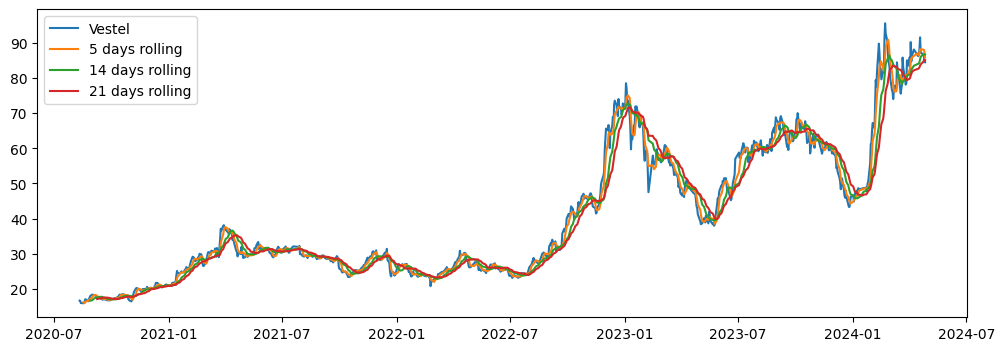

In [ ]:
##figsize=(20,10) parametresi, grafiğin genişliğini ve yüksekliğini belirler.
##Her ax.plot çağrısı, bir çizgi çizmek için gereken verileri ve çizginin etiketini içerir.
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(close_app.index, close_app, label='Vestel')
ax.plot(rolling_app5.index, rolling_app5, label='5 days rolling')
ax.plot(rolling_app14.index, rolling_app14, label='14 days rolling')
ax.plot(rolling_app21.index, rolling_app21, label='21 days rolling')
ax.legend(loc='upper left')

In [ ]:
MAs['Short']-MAs['Mid']

Date
2020-09-08    0.395714
2020-09-09    0.198000
2020-09-10   -0.007000
2020-09-11   -0.233000
2020-09-14   -0.408429
                ...   
2024-04-19    1.983572
2024-04-22    1.517144
2024-04-24    1.324286
2024-04-25    0.519286
2024-04-26   -0.804286
Length: 911, dtype: float64

In [ ]:
np.array(MAs['Short']-MAs['Mid'])

array([ 3.95714351e-01,  1.98000009e-01, -6.99994223e-03, -2.33000183e-01,
       -4.08428873e-01, -4.74000141e-01, -4.65000098e-01, -4.84571838e-01,
       -4.27143206e-01, -3.79714339e-01, -3.20428658e-01, -2.67714446e-01,
       -1.81857027e-01, -2.32714054e-01, -2.10857119e-01, -2.38999912e-01,
       -1.79142679e-01, -8.17143304e-02,  2.57126944e-03,  8.35713523e-02,
        1.99285643e-01,  1.90856934e-01,  2.25285394e-01,  2.51428277e-01,
        3.18999808e-01,  3.75999832e-01,  4.57714135e-01,  5.50857135e-01,
        6.13000052e-01,  6.16571372e-01,  5.85857255e-01,  5.00000191e-01,
        4.18285942e-01,  3.24428913e-01,  1.94286074e-01,  1.00143160e-01,
       -1.42285265e-01, -4.19856780e-01, -6.64571217e-01, -8.40571322e-01,
       -8.38428361e-01, -5.76428577e-01, -1.44285910e-01,  4.65571376e-01,
        1.01599979e+00,  1.31214245e+00,  1.51828540e+00,  1.56299989e+00,
        1.36642846e+00,  1.09114257e+00,  8.55571093e-01,  5.14571217e-01,
        2.58571080e-01,  

In [ ]:
# Short ve Mid değerleri arasındaki tüm değerler içindeki en küçük %10. değeri
##Amaç uzaklıklar arasındaki optimum uzaklık
np.abs(np.percentile(np.array(MAs['Short']-MAs['Mid']),10))

2.0471431187221043

In [ ]:
def buy_sell_MA(data, opt = 50):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  up = data[(np.array(data['Short']-data['Mid'])>0) & (np.array(data['Short']-data['Long'])>0)]
  down = data[(np.array(data['Short']-data['Mid'])<0) & (np.array(data['Short']-data['Long'])<0)]

  ups = np.percentile(np.array(up['Short']-up['Mid']),opt)
  downs = np.percentile(np.array(down['Short']-down['Long']),opt)

  for i in range(0,len(data)):
    if (data['Short'][i] > data['Mid'][i]+ups) & (data['Short'][i] > data['Long'][i]+ups):
      buy_signal.append(np.nan)
      if flag != 1:
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['Short'][i] < data['Mid'][i]+downs ) & (data['Short'][i] < data['Long'][i]+downs):
      sell_signal.append(np.nan)
      if flag != 0:
        buy_signal.append(data['Close'][i])
        buy_sell.append(-data['Close'][i])
        flag = 0
      else :
        buy_signal.append(np.nan)
    else :
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)
      buy_sell.append(np.nan)
    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)

In [ ]:
MAs['BUY']=buy_sell_MA(MAs)[0]
MAs['SELL']=buy_sell_MA(MAs)[1]

<function matplotlib.pyplot.show(close=None, block=None)>

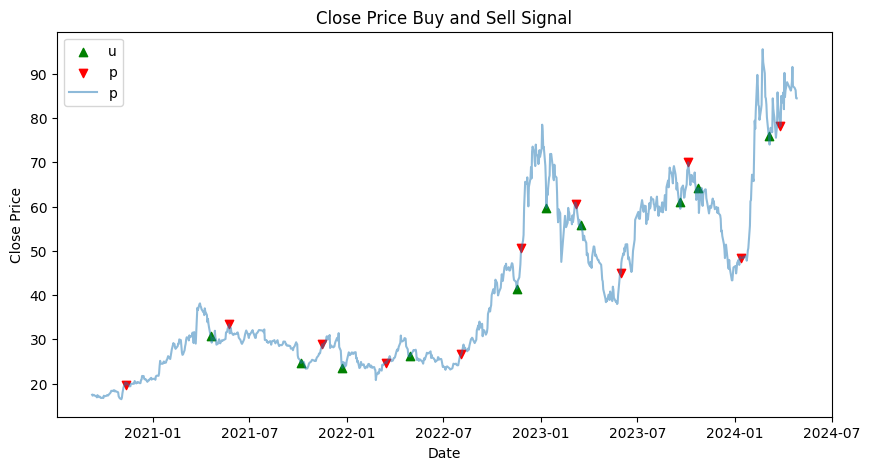

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(MAs.index, MAs['BUY'], color = 'green', label = 'BUY', marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs['SELL'], color = 'red', label = 'SELL', marker = 'v', alpha = 1)
plt.plot(MAs['Close'], label = 'Close Price', alpha = 0.5)
plt.title('Close Price Buy and Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend('upper left')
plt.show

In [ ]:
np.arange(10,91,5)

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

In [ ]:
opt = []
percentile = np.arange(10,91,5)
for i,j in enumerate(percentile):
  opt.append((percentile[i],buy_sell_MA(MAs,j)[2]))
opt = pd.DataFrame(opt)
opt.columns = ['Percentile','Performance']
opt = opt.sort_values(by='Performance',ascending=False)

In [ ]:
opt.head()

,Percentile,Performance
16,90,41.819998
9,55,0.000000
15,85,0.000000
14,80,0.000000
13,75,0.000000


In [ ]:
opt['Percentile']

16    90
9     55
15    85
14    80
13    75
12    70
11    65
10    60
0     10
1     15
7     45
6     40
5     35
4     30
3     25
2     20
8     50
Name: Percentile, dtype: int64

In [ ]:
opt['Percentile'].values[0]

90

In [ ]:
MAs['BUY']= buy_sell_MA(MAs, opt['Percentile'].values[0])[0]
MAs['SELL']= buy_sell_MA(MAs, opt['Percentile'].values[0])[1]

<function matplotlib.pyplot.show(close=None, block=None)>

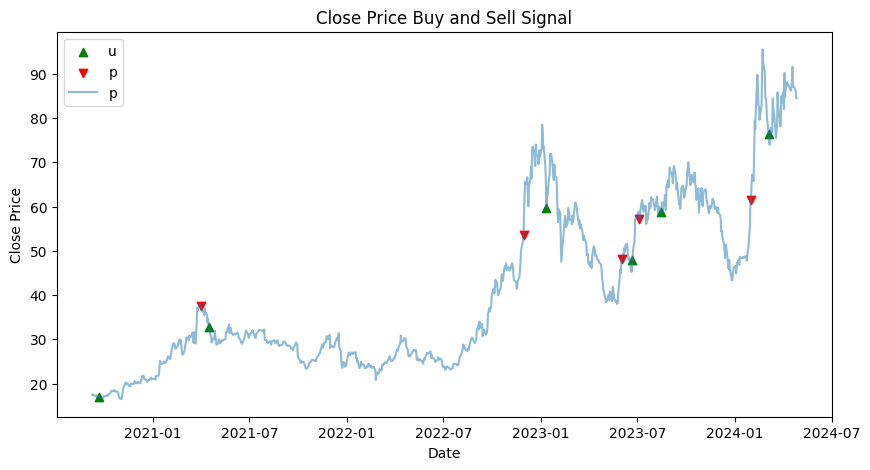

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(MAs.index, MAs['BUY'], color = 'green', label = 'BUY', marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs['SELL'], color = 'red', label = 'SELL', marker = 'v', alpha = 1)
plt.plot(MAs['Close'], label = 'Close Price', alpha = 0.5)
plt.title('Close Price Buy and Sell Signal')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend('upper left')
plt.show

In [ ]:
##Bollinger Band

In [ ]:
MAs['Close'].rolling(window = 20).mean()

Date
2020-09-08        NaN
2020-09-09        NaN
2020-09-10        NaN
2020-09-11        NaN
2020-09-14        NaN
               ...   
2024-04-19    84.2675
2024-04-22    84.7600
2024-04-24    85.1750
2024-04-25    85.1100
2024-04-26    85.1825
Name: Close, Length: 911, dtype: float64

In [ ]:
BBs=pd.DataFrame()
BBs['Close']=MAs['Close']
BBs['SMA']=MAs['Close'].rolling(window = 20).mean()
BBs['STD']=MAs['Close'].rolling(window = 20).std() # 20 gözlemlik standart sapma değerleri
BBs['upper']=BBs['SMA']+BBs['STD']*2 #Ortalamadan iki std sapma yukarı
BBs['lower']=BBs['SMA']-BBs['STD']*2 #Ortalamadan iki std sapma aşağı
## Amaç std sapmalar arası oluşturarak bir güven aralığı belirleme
BBs.dropna(axis=0, inplace = True)
BBs.head()

,Close,SMA,STD,upper,lower
Date,,,,,
2020-10-05,17.240000,17.1165,0.235087,17.586674,16.646325
2020-10-06,17.389999,17.1120,0.228533,17.569066,16.654934
2020-10-07,17.400000,17.1185,0.235020,17.588540,16.648460
2020-10-08,17.299999,17.1150,0.231573,17.578146,16.651853
2020-10-09,17.469999,17.1155,0.232367,17.580234,16.650766


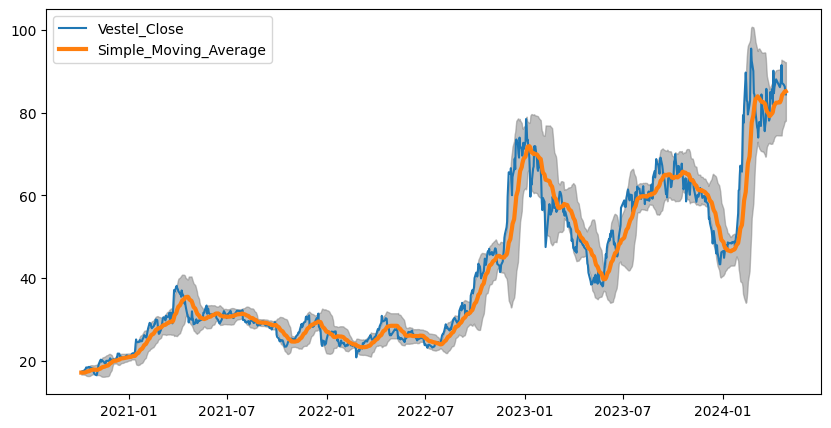

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
x_axis = BBs.index
ax.fill_between(x_axis, BBs['upper'], BBs['lower'], color = 'grey', alpha = 0.5)
ax.plot(x_axis,BBs['Close'],label = 'Vestel_Close')
ax.plot(x_axis,BBs['SMA'],label = 'Simple_Moving_Average',lw = 3)
ax.legend()

In [ ]:
def buy_sell_BB(data):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  for i in range(0,len(data)):
    if (data['Close'][i] > data['upper'][i]):
      buy_signal.append(np.nan)
      if flag != 1 :
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['Close'][i] < data['lower'][i]):
        sell_signal.append(np.nan)
        if flag != 0 :
          buy_signal.append(data['Close'][i])
          buy_sell.append(-data['Close'][i])
          flag = 0
        else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]

    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)



In [ ]:
BBs['BUY']=buy_sell_BB(BBs)[0]
BBs['SELL']=buy_sell_BB(BBs)[1]

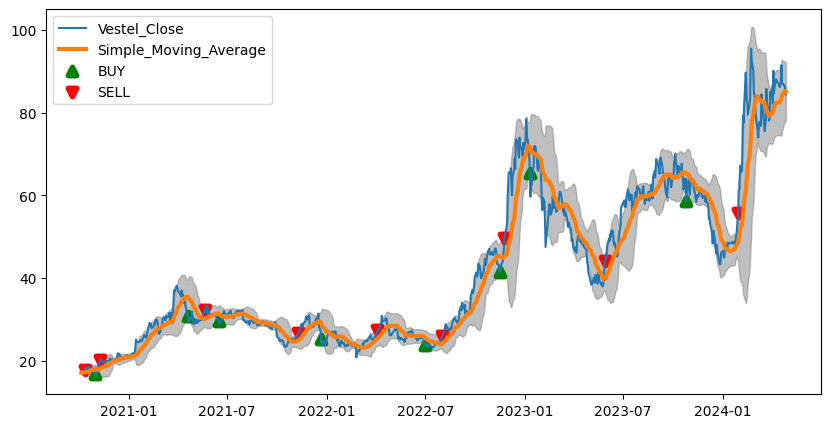

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs['upper'], BBs['lower'], color = 'grey', alpha = 0.5)
ax.plot(x_axis,BBs['Close'],label = 'Vestel_Close')
ax.plot(x_axis,BBs['SMA'],label = 'Simple_Moving_Average',lw = 3)
ax.scatter(x_axis, BBs['BUY'],color = 'green',lw=4,label='BUY',marker='^')
ax.scatter(x_axis, BBs['SELL'],color = 'red',lw=4,label='SELL',marker='v')
ax.legend()

In [ ]:
decisions = pd.merge(BBs[['BUY','SELL']],MAs[['BUY','SELL']],left_index=True, right_index=True)
decisions.columns = ['BUY_MA','SELL_MA','BUY_BB','SELL_BB']
decisions

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2020-10-05,NaN,NaN,NaN,NaN
2020-10-06,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2024-04-19,NaN,NaN,NaN,NaN
2024-04-22,NaN,NaN,NaN,NaN
2024-04-24,NaN,NaN,NaN,NaN


In [ ]:
decisions.dropna(thresh=2,axis=0)

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,


In [ ]:
decisions.dropna(thresh=1,axis=0)

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2020-10-12,NaN,17.860001,NaN,NaN
2020-10-30,16.680000,NaN,NaN,NaN
2020-11-09,NaN,20.080000,NaN,NaN
2021-03-31,NaN,NaN,NaN,37.500000
2021-04-16,NaN,NaN,32.700001,NaN
2021-04-19,30.760000,NaN,NaN,NaN
2021-05-21,NaN,32.380001,NaN,NaN
2021-06-15,29.520000,NaN,NaN,NaN
2021-11-09,NaN,26.799999,NaN,NaN


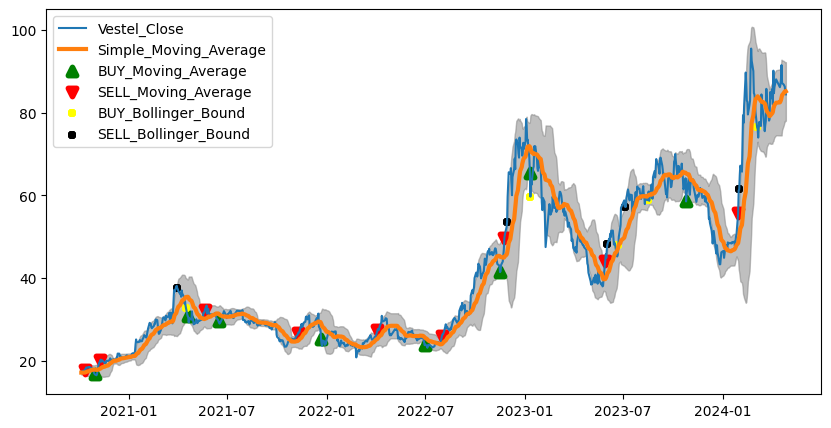

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs['upper'], BBs['lower'], color = 'grey', alpha = 0.5)
ax.plot(x_axis,BBs['Close'],label = 'Vestel_Close')
ax.plot(x_axis,BBs['SMA'],label = 'Simple_Moving_Average',lw = 3)
ax.scatter(x_axis, decisions['BUY_MA'],color = 'green',lw=4,label='BUY_Moving_Average',marker='^')
ax.scatter(x_axis, decisions['SELL_MA'],color = 'red',lw=4,label='SELL_Moving_Average',marker='v')
ax.scatter(x_axis, decisions['BUY_BB'],color = 'yellow',lw=4,label='BUY_Bollinger_Bound',marker='+')
ax.scatter(x_axis, decisions['SELL_BB'],color = 'black',lw=4,label='SELL_Bollinger_Bound',marker='+')

ax.legend()

In [ ]:
##MACD

In [ ]:
#span : ağırlıklandırma şiddeti
MDs = pd.DataFrame()
MDs['Close']=MAs['Close']
MDs['Short'] = MDs['Close'].ewm(span=12, adjust = False).mean() # a = 2/(span+1)
MDs['Long'] = MDs['Close'].ewm(span=26, adjust = False).mean()
MDs['MACD'] = MDs['Short'] - MDs['Long']
MDs['signal'] = MDs['MACD'].ewm(span = 9, adjust = False).mean() #MACD değerlerinin 9 günlük ağırlıklandırılmış hareketli ortalaması

In [ ]:
MDs.head()

,Close,Short,Long,MACD,signal
Date,,,,,
2020-09-08,17.480000,17.480000,17.480000,0.000000,0.000000
2020-09-09,17.270000,17.447692,17.464444,-0.016752,-0.003350
2020-09-10,17.370001,17.435740,17.457448,-0.021709,-0.007022
2020-09-11,17.459999,17.439472,17.457637,-0.018165,-0.009251
2020-09-14,17.209999,17.404168,17.439294,-0.035125,-0.014426


In [ ]:
len(MDs)

911

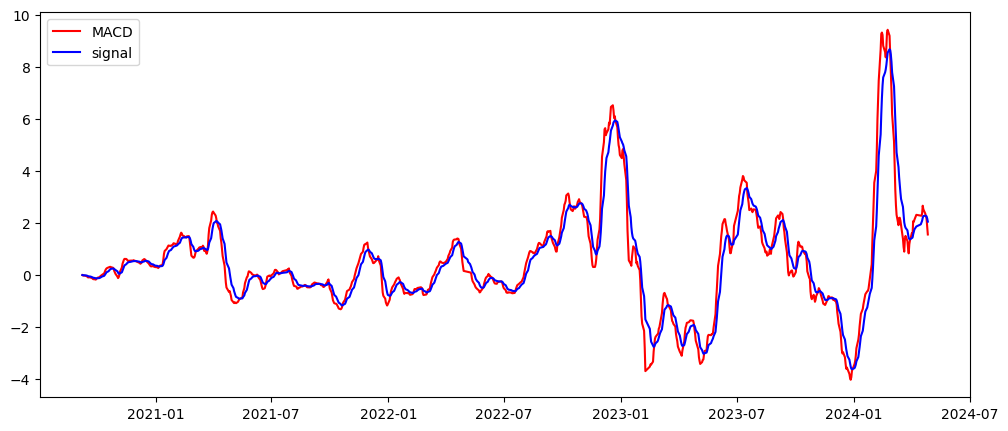

In [ ]:
# Kırmızı/mavi kesişimi al - sat tavsiyesi
plt.figure(figsize=(12,5))
plt.plot(MDs.index, MDs.MACD, color = 'red',label = 'MACD')
plt.plot(MDs.index, MDs.signal, color = 'blue', label = 'signal')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Kırmızı mavinin altında : BUY
# Kırmızı mavinin üstünde : SELL

In [ ]:
def buy_sell_MD(data, opt = 50):
  buy_sell = []
  buy_signal = []
  sell_signal = []
  flag = 42

  up = data[(np.array(data['MACD'] - data['signal'])>0)]
  down = data[(np.array(data['MACD'] - data['signal'])<0)]

  ups = np.percentile(np.array(up['MACD'] - up['signal']),opt)
  downs = np.percentile(np.array(down['MACD'] - down['signal']),opt)

  for i in range(0,len(data)):
    if (data['MACD'][i] > data['signal'][i] + ups):
      buy_signal.append(np.nan)
      if flag != 1 :
        sell_signal.append(data['Close'][i])
        buy_sell.append(data['Close'][i])
        flag = 1
      else:
        sell_signal.append(np.nan)
    elif (data['MACD'][i] < data['signal'][i] + downs):
        sell_signal.append(np.nan)
        if flag != 0 :
          buy_signal.append(data['Close'][i])
          buy_sell.append(-data['Close'][i])
          flag = 0
        else:
          buy_signal.append(np.nan)
    else:
      buy_sell.append(np.nan)
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]
    neg=0
    pos=0

    for i in range(len(operations)):
      if operations[i] <0:
        neg=i
        break
    for i in range(1,len(operations)):
      if operations[-i] > 0:
        pos = i-1
        break
    operations = operations[neg:-pos]
    PL = np.sum(operations)
  return (buy_signal,sell_signal,PL)



In [ ]:
MDs['BUY']=buy_sell_MD(MDs)[0]
MDs['SELL']=buy_sell_MD(MDs)[1]

In [ ]:
percentile = np.arange(10,91,5)
percentile

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90])

In [ ]:
opt = []
percentile = np.arange(10,91,5)
for i,j in enumerate(percentile):
  opt.append((percentile[i],buy_sell_MD(MDs, j)[2]))
opt = pd.DataFrame(opt)
opt.columns = ['Percentile','Performance']
opt = opt.sort_values(by = 'Performance', ascending=False)
opt.head()

,Percentile,Performance
13,75,33.310005
12,70,30.630005
15,85,28.369999
14,80,25.380005
16,90,22.520004


In [ ]:
opt['Percentile'].values[0]

75

In [ ]:
MDs['BUY'] = buy_sell_MD(MDs, opt['Percentile'].values[0])[0]
MDs['SELL'] = buy_sell_MD(MDs, opt['Percentile'].values[0])[1]

In [ ]:
buy_sell_MD(MDs, opt['Percentile'].values[0])[2] # Percentile en iyi olanın performansı

33.31000518798828

In [ ]:
decisions = pd.merge(BBs[['BUY','SELL']],MAs[['BUY','SELL']],left_index=True, right_index=True)
decisions = pd.merge(decisions, MDs[['BUY','SELL']],left_index=True, right_index=True)
decisions.columns = ['BUY_MA','SELL_MA','BUY_BB','SELL_BB','BUY_MACD','SELL_MACD']
decisions

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2020-10-05,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-07,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-04-19,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-22,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-24,NaN,NaN,NaN,NaN,86.300003,NaN


In [ ]:
decisions.dropna(thresh=2,axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2020-10-30,16.68,NaN,NaN,NaN,16.68,NaN


In [ ]:
decisions.dropna(thresh=1,axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2020-10-12,NaN,17.860001,NaN,NaN,NaN,NaN
2020-10-30,16.68,NaN,NaN,NaN,16.68,NaN
2020-11-09,NaN,20.080000,NaN,NaN,NaN,NaN
2021-03-25,NaN,NaN,NaN,NaN,NaN,37.099998
2021-03-31,NaN,NaN,NaN,37.5,NaN,NaN
